# Introduction

This will be my notes for what I've learned in my journey as I work through building my first live trading algo.

# Overview

There are a couple parts that I've decided to break up my process into.

1. Idea Generation
2. Portfolio Generation
3. Unconstrained Backtesting
4. Repeat 1-3 as necessary
5. Constrained Backtesting

# 1 - Idea Generation

There are many ways for idea generation that are common. 

### Iterate on other ideas

Iterate on another idea that we've found and do our own testing.

Below is something that may be one of our processes. Ideas can come from anywhere, including research papers, blogs, books, hearsay, reddit, other fields of science, and so on.

**Process:** Reading research papers, coming up with questions and next steps and do them.

**Example:** After seeing a research paper on the lessened effect of earnings surprise if it falls on a Friday, we may think to extend this chain of thought and intuition to post announcement drift. 

The intuition is that we may hypothesize that investors may not pay attention as much to news over the weekend. If it is true, then effects other than what the initial research paper suggests also may be true. Another thing that may also be true is that we can capitalize harder on index rebalancing if it is announced over the weekend. We can create a strategy for that and backtest it.


### Come up with one on your own

Gain inspiration from new psychology studies, look at graphs, mix existing strategies. Come up with interesting hedges instead that don't need positive returns.

# 2 - Portfolio Generation

This portion broadly can be described as transforming the raw data that you've choosen for your signal into weights of the underlying securities.

### Raw Data

This can be from anywhere. 

Fundamental data from compustat/simfin for testing is ok wiht one year data lag. We can assume that the day after the publish data is when it is available to everyone and the effects should be incorporated in pricings.

Pricing data from yfinance/WRDS is good.

Analyst rating data from NASDAQ, WRDS can be used.

The important part is to be clear of dates to prevent lookahead bias, like publish date.

### Signal Building

The next step is to transform our raw data into a signal. Signal's weights are arbitrary, but we want the direction to be correct.

So a security with a positive signal weight we would expect to buy with some weight.

### Portfolio Weights

If a signal is 3x as strong on a particular security than another, should we weight 3x as much? Not neccessarily. It wouldn't make sense in most cases actually, like sentiment. If positive sentiment is 3x stronger on Tesla vs Nvidia, we should probably weight Tesla more, but not 3x as much. That wouldn't make sense. 

Therefore here we want to change our signal weights into actual weights of securities that we want to buy based on the signal. 

When looking at our signal distribution, we see that there are outliers, often times as errors but also valid. In any case, it is up to us on how we want to deal with it. Leaving it in will deweight everything in favor of the security with the large signal, so in most cases we want to deal with it when transitioning from signal weights to portfolio weights.

This is a list of options that we have when transforming our signal weights into portfolio weights.
- Windsorize
    - Choose a percentile x, then set all data below x to x and all data above 1-x to 1-x
    - Keeps signal weightings, but deals with outliers
- Rank
    - Change weights to rankings instead - i.e 1,2,3,4,...
    - Signal weightings aren't as important, and outliers are dealt with
- Rank and cut
    - Rank method but the middle is cut out.
    - Use when we expect there only to be an effect at the tails
- Inverse CDF
    - Change signal weights to 

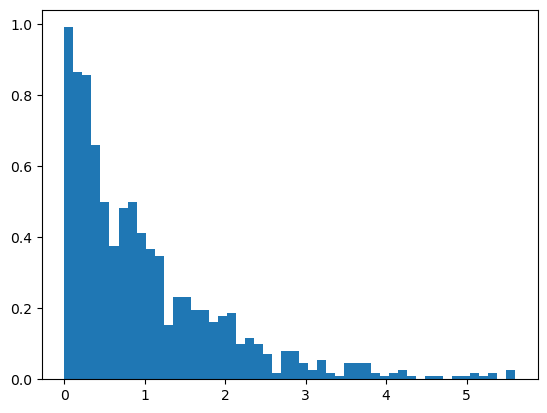

In [1]:
# Example of an inverse CDF transform
import numpy as np
import matplotlib.pyplot as plt

# Define the inverse CDF
def inv_cdf(p):
    return np.log(1/(1-p))

# Generate random numbers
n = 1000
p = np.random.rand(n)
x = inv_cdf(p)

# Plot the histogram
plt.hist(x, bins=50, density=True)
plt.show()

# Complilation of Common Signals

# Learning Moments

### Live Trading


***Transactional Costs***

I didn't realize what big effect slippage had on my trades, even at low numbers of dollars invested. Especialy in crypto, where if you are trading on a coin with a daily volume of $10,000, buying 30$ worth of it is rarely a profitable short term investment due to bid-ask spead, commisions, and even slippage. I tried a strategy in live trading that would hold positions in these coins for like 1-5 hours, and the price movement never really ever justified the position, resulting in a pretty negative sharpe.

***Liquidity Constraints***

Liquidity constraints are important. Specifically spread and trading volume. 

### Backtesting Mistakes

***


### Exchange Specific Mistakes

Different exchanges are different when it comes to coin offerings, spread, and trading volume.
Also, the additional contraint of working in the US poses many unique challenges when dealing with crypto.

***Tradability***

For one, depending on the exchange, coins are not tradable, even when just trying to hold a long position. You will be able to get the data for it, but you will get an error when trying to submit an order for it. Therefore, due diligence includes making sure that the coins that you are working with are tradable using the API of the exchange you are working with.

***Shorting***

As of 2025, you are basically unable to short in the US. On Kraken, you are only able to open a margin account if you prove you have 10 million dollars in assets. For the purposes of what I'm doing, it's not really feasible to short.


***Binance US***

Don't use this for backtesting or live trading, it doesn't use the same data as Binance and the offerings are much much smaller. The prices are different, and everything is in USDT. US regulation has basically killed any type of quant activity on this site.